In [1]:
import torch

In [2]:
T = torch.tensor([[[0.8, 0.1, 0.1],
                   [0.1, 0.6, 0.3]],
                  [[0.7, 0.2, 0.1],
                   [0.1, 0.8, 0.1]],
                  [[0.6, 0.2, 0.2],
                   [0.1, 0.4, 0.5]]]
                 )

R = torch.tensor([1., 0, -1.])

gamma = .5

# to stop process define
threshold = 0.0001


In [3]:
# we allways select a0 (learn)
policy_optimal = torch.tensor([[1.0, 0.0],
                               [1.0, 0.0],
                               [1.0, 0.0]])

In [4]:
policy_random = torch.tensor([[0.5, 0.5],
                              [0.5, 0.5],
                              [0.5, 0.5]])

# Iterative evaluation

In [5]:
def policy_evaluation(policy, trans_matrix, rewards, gamma, threshold):
    """
    Perform policy evaluation
    @param policy: policy matrix containing actions and their probability in each state
    @param trans_matrix: transformation matrix
    @param rewards: rewards for each state
    @param gamma: discount factor
    @param threshold: the evaluation will stop once values for all states are less than the threshold
    @return: values of the given policy for all possible states
    """
    n_state = policy.shape[0]
    V = torch.zeros(n_state)
    while True:
        V_temp = torch.zeros(n_state)
        for state, actions in enumerate(policy):
            for action, action_prob in enumerate(actions):
                V_temp[state] += action_prob * (R[state] + gamma * torch.dot(trans_matrix[state, action], V))
        max_delta = torch.max(torch.abs(V - V_temp))
        V = V_temp.clone()
        if max_delta <= threshold:
            break
    return V

In [6]:
V = policy_evaluation(policy_optimal, T, R, gamma, threshold)
print("The value function under the optimal policy is:\n{}".format(V))

V = policy_evaluation(policy_random, T, R, gamma, threshold)
print("The value function under the random policy is:\n{}".format(V))

The value function under the optimal policy is:
tensor([ 1.6786,  0.6260, -0.4821])
The value function under the random policy is:
tensor([ 1.2348,  0.2691, -0.9013])


In [7]:
def policy_evaluation_history(policy, trans_matrix, rewards, gamma, threshold):
    n_state = policy.shape[0]
    V = torch.zeros(n_state)
    V_his = [V]
    i = 0
    while True:
        V_temp = torch.zeros(n_state)
        i += 1
        for state, actions in enumerate(policy):
            for action, action_prob in enumerate(actions):
                V_temp[state] += action_prob * (R[state] + gamma * torch.dot(trans_matrix[state, action], V))
        max_delta = torch.max(torch.abs(V - V_temp))
        V = V_temp.clone()
        V_his.append(V)
        if max_delta <= threshold:
            break
    return V, V_his

[tensor([0., 0., 0.]), tensor([ 1.,  0., -1.]), tensor([ 1.3500,  0.3000, -0.8000]), tensor([ 1.5150,  0.4625, -0.6450]), tensor([ 1.5969,  0.5443, -0.5638]), tensor([ 1.6378,  0.5851, -0.5229]), tensor([ 1.6582,  0.6056, -0.5024]), tensor([ 1.6684,  0.6158, -0.4922]), tensor([ 1.6736,  0.6209, -0.4871]), tensor([ 1.6761,  0.6235, -0.4846]), tensor([ 1.6774,  0.6248, -0.4833]), tensor([ 1.6780,  0.6254, -0.4826]), tensor([ 1.6784,  0.6257, -0.4823]), tensor([ 1.6785,  0.6259, -0.4822]), tensor([ 1.6786,  0.6260, -0.4821])]
[tensor([0., 0., 0.]), tensor([ 1.,  0., -1.]), tensor([ 1.1250,  0.1500, -1.0000]), tensor([ 1.1794,  0.2125, -0.9556]), tensor([ 1.2070,  0.2412, -0.9290]), tensor([ 1.2209,  0.2553, -0.9152]), tensor([ 1.2279,  0.2622, -0.9082]), tensor([ 1.2313,  0.2657, -0.9047]), tensor([ 1.2331,  0.2675, -0.9030]), tensor([ 1.2339,  0.2683, -0.9021]), tensor([ 1.2344,  0.2688, -0.9017]), tensor([ 1.2346,  0.2690, -0.9015]), tensor([ 1.2347,  0.2691, -0.9014]), tensor([ 1.2348,

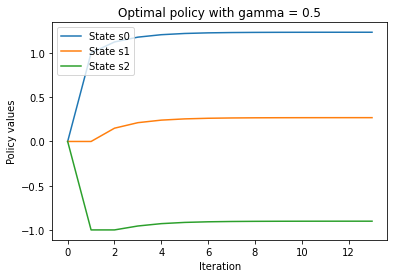

In [8]:
V, V_history = policy_evaluation_history(policy_optimal, T, R, gamma, threshold)
print(V_history)
V, V_history = policy_evaluation_history(policy_random, T, R, gamma, threshold)
print(V_history)

import matplotlib.pyplot as plt
s0, = plt.plot([v[0] for v in V_history])
s1, = plt.plot([v[1] for v in V_history])
s2, = plt.plot([v[2] for v in V_history])
plt.title('Optimal policy with gamma = {}'.format(str(gamma)))
plt.xlabel('Iteration')
plt.ylabel('Policy values')
plt.legend([s0, s1, s2],
           ["State s0",
            "State s1",
            "State s2"], loc="upper left")
plt.show()

# Evaluation of the Strategy the matrix approach 

In [9]:
def cal_value_matrix_inversion(gamma, trans_matrix, rewards):
    inv = torch.inverse(torch.eye(rewards.shape[0]) - gamma * trans_matrix)
    V = torch.mm(inv, rewards.reshape(-1, 1))
    return V

In [10]:
# Optimal solution - select a0 (learn)
action = 0
trans_matrix = T[:, action]
print(f"trans_matrix is \n{trans_matrix}")
      
V = cal_value_matrix_inversion(gamma, trans_matrix, R)
print("The value function under the optimal policy is:\n{}".format(V))

trans_matrix is 
tensor([[0.8000, 0.1000, 0.1000],
        [0.7000, 0.2000, 0.1000],
        [0.6000, 0.2000, 0.2000]])
The value function under the optimal policy is:
tensor([[ 1.6787],
        [ 0.6260],
        [-0.4820]])


# For not optimal this matrix implemented method cannot be used because we need to know action which we choose always. It our oprimal case its 0 action. According to random our actions are equal. (We dont know future step?)
Maybe we can rewrite method which will use probability of taking action?

# Dependency of iteration number to calculate value function according to gamma

In [11]:
import numpy as np

In [12]:
def policy_evaluation(policy, trans_matrix, rewards, gamma, threshold):
    """
    Perform policy evaluation
    @param policy: policy matrix containing actions and their probability in each state
    @param trans_matrix: transformation matrix
    @param rewards: rewards for each state
    @param gamma: discount factor
    @param threshold: the evaluation will stop once values for all states are less than the threshold
    @return: values of the given policy for all possible states
    """
    n_state = policy.shape[0]
    V = torch.zeros(n_state)
    i = 0
    while True:
        i+=1
        V_temp = torch.zeros(n_state)
        for state, actions in enumerate(policy):
            for action, action_prob in enumerate(actions):
                V_temp[state] += action_prob * (R[state] + gamma * torch.dot(trans_matrix[state, action], V))
        max_delta = torch.max(torch.abs(V - V_temp))
        V = V_temp.clone()
        if max_delta <= threshold:
            break
    return V,i

In [13]:
import numpy as np
V_dep_gamma = []
iters = []
for gamma in np.arange(0.0, 1.0, 0.1):
    V,i = policy_evaluation(policy_optimal, T, R, gamma, threshold)
    V_dep_gamma.append(V)
    iters.append(i)

Text(0, 0.5, 'Count of iterations')

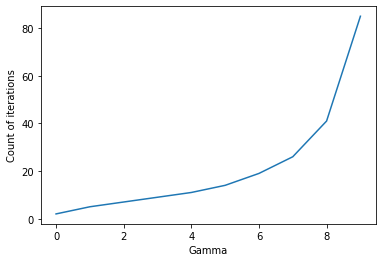

In [14]:
import matplotlib.pyplot as plt
plt.plot(iters)
plt.xlabel('Gamma')
plt.ylabel('Count of iterations')

# Dependency of value function according to gamma

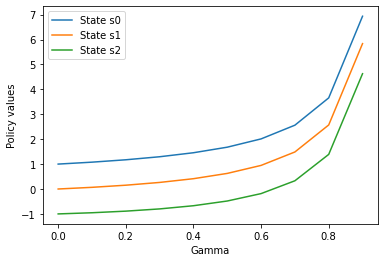

In [15]:
# import matplotlib.pyplot as plt
s0, = plt.plot(np.arange(0.0, 1.0, 0.1), [v[0] for v in V_dep_gamma])
s1, = plt.plot(np.arange(0.0, 1.0, 0.1), [v[1] for v in V_dep_gamma])
s2, = plt.plot(np.arange(0.0, 1.0, 0.1), [v[2] for v in V_dep_gamma])
plt.xlabel('Gamma')
plt.ylabel('Policy values')
plt.legend([s0, s1, s2],
           ["State s0",
            "State s1",
            "State s2"], loc="upper left")
plt.show()

# Matrix approach faster than iterative and demands less computing capabilities, but can't be used for not optimal? thats why bellman's equation are used for estimation the best action?
